In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [2]:
wineDF_og = pd.read_csv('wine-clustering.csv')
wineDF_og

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [3]:
wineDF = wineDF_og[['Alcohol','Magnesium','Total_Phenols']].copy()
wineDF

,Alcohol,Magnesium,Total_Phenols
0,14.23,127,2.80
1,13.20,100,2.65
2,13.16,101,2.80
3,14.37,113,3.85
4,13.24,118,2.80
...,...,...,...
173,13.71,95,1.68
174,13.40,102,1.80
175,13.27,120,1.59
176,13.17,120,1.65


In [4]:
k4 = KMeans(n_clusters=4, random_state=9)
k4.fit(wineDF[['Alcohol','Magnesium','Total_Phenols']])
wineDF['lbl_k4'] = k4.labels_

wineDF

,Alcohol,Magnesium,Total_Phenols,lbl_k4
0,14.23,127,2.80,3
1,13.20,100,2.65,1
2,13.16,101,2.80,1
3,14.37,113,3.85,3
4,13.24,118,2.80,3
...,...,...,...,...
173,13.71,95,1.68,1
174,13.40,102,1.80,1
175,13.27,120,1.59,3
176,13.17,120,1.65,3


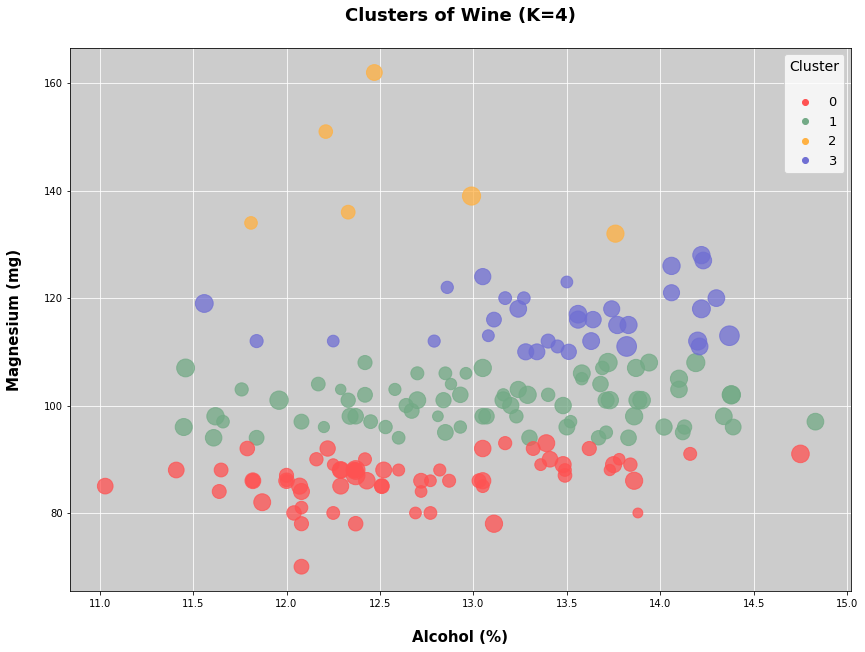

In [5]:
fig, ax = plt.subplots(figsize=(14,10))

#Create custom color dictionary
colorDict = {0:'#ff5252', 1:'#73AA86', 2:'#ffb142', 3:'#706fd3', 4:'#33d9b2'}

#set axes bg color
ax.patch.set_facecolor('#CCCCCC')

#plot the data
ax.scatter(wineDF['Alcohol'], wineDF['Magnesium'], s=wineDF['Total_Phenols']*100,
           c=wineDF['lbl_k4'].map(colorDict), alpha=0.75, zorder=2)

ax.set_title('Clusters of Wine (K=4)\n', fontsize=18, weight='bold')
ax.set_xlabel('\nAlcohol (%)', fontsize=15, weight='bold')
ax.set_ylabel('Magnesium (mg)\n', fontsize=15, weight='bold')

#Create list of marker objects for legend parameter input
markers = [plt.Line2D([0,0],[0,0], color=color, marker='o', linestyle='') for color in colorDict.values()]

#Create the legend
plt.legend(markers, list(colorDict.keys())[:4], prop={'size':13},
           title='Cluster\n', title_fontsize=14)

plt.grid(color='white', zorder=0)

plt.show()

In [6]:
#Display Centroids
centroid_k4 = k4.cluster_centers_
centroid_k4

array([[ 12.66984615,  86.35384615,   2.11953846],
       [ 13.10794521, 100.36986301,   2.34369863],
       [ 12.595     , 142.33333333,   2.35      ],
       [ 13.47411765, 116.47058824,   2.51676471]])

In [7]:
#
k4.feature_names_in_

array(['Alcohol', 'Magnesium', 'Total_Phenols'], dtype=object)

In [8]:
#X axis of Centroid
centroidX = centroid_k4[:,0]
centroidX

array([12.66984615, 13.10794521, 12.595     , 13.47411765])

In [9]:
#Y axis of Centroid
centroidY = centroid_k4[:,1]
centroidY

array([ 86.35384615, 100.36986301, 142.33333333, 116.47058824])

In [10]:
#Z axis of Centroid
centroidZ = centroid_k4[:,2]
centroidZ

array([2.11953846, 2.34369863, 2.35      , 2.51676471])

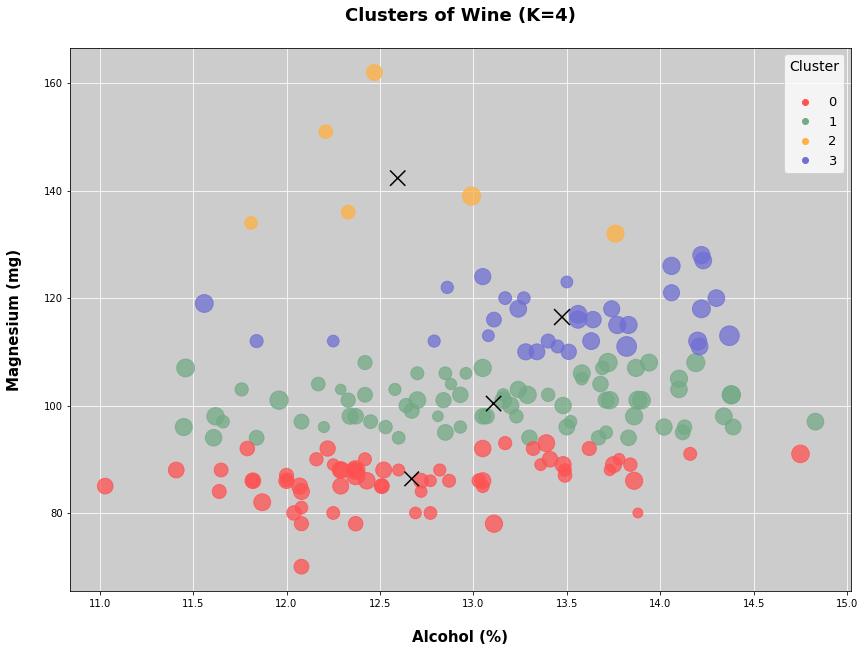

In [11]:
fig, ax = plt.subplots(figsize=(14,10))

#Create custom color dictionary
colorDict = {0:'#ff5252', 1:'#73AA86', 2:'#ffb142', 3:'#706fd3', 4:'#33d9b2'}

#set axes bg color
ax.patch.set_facecolor('#CCCCCC')

#plot the data
ax.scatter(wineDF['Alcohol'], wineDF['Magnesium'], s=wineDF['Total_Phenols']*100,
           c=wineDF['lbl_k4'].map(colorDict), alpha=0.75, zorder=2)

#plot the centroids
ax.scatter(centroidX, centroidY, s=centroidZ*100, c='black', marker='x', zorder=3)

ax.set_title('Clusters of Wine (K=4)\n', fontsize=18, weight='bold')
ax.set_xlabel('\nAlcohol (%)', fontsize=15, weight='bold')
ax.set_ylabel('Magnesium (mg)\n', fontsize=15, weight='bold')

#Create list of marker objects for legend parameter input
markers = [plt.Line2D([0,0],[0,0], color=color, marker='o', linestyle='') for color in colorDict.values()]

#Create the legend
plt.legend(markers, list(colorDict.keys())[:4], prop={'size':13},
           title='Cluster\n', title_fontsize=14)

plt.grid(color='white', zorder=0)

plt.show()

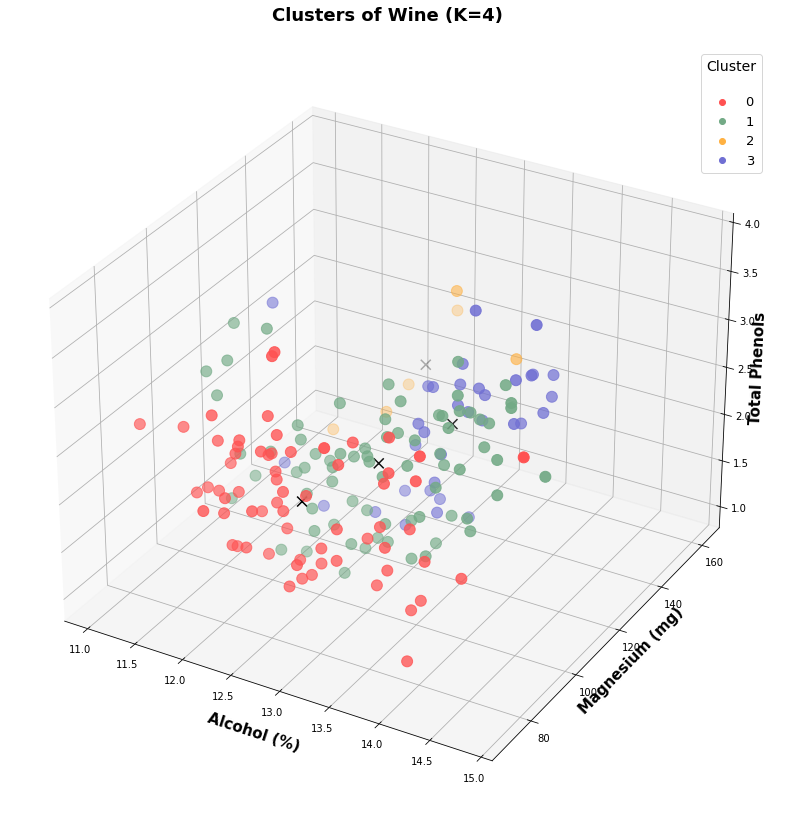

In [12]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(14,14))
ax = fig.add_subplot(projection = '3d')

x = wineDF['Alcohol']
y = wineDF['Magnesium']
z = wineDF['Total_Phenols']

#Create custom color dictionary
colorDict = {0:'#ff5252', 1:'#73AA86', 2:'#ffb142', 3:'#706fd3', 4:'#33d9b2'}

#plot the data
ax.scatter(x, y, z, c=wineDF['lbl_k4'].map(colorDict), s=120)

#plot the centroids
ax.scatter(centroidX, centroidY, centroidZ, s=100, c='black', marker='x')

ax.set_title('Clusters of Wine (K=4)\n', fontsize=18, weight='bold')
ax.set_xlabel('\nAlcohol (%)', fontsize=15, weight='bold')
ax.set_ylabel('Magnesium (mg)\n', fontsize=15, weight='bold')
ax.set_zlabel('Total Phenols\n', fontsize=15, weight='bold')

#Create list of marker objects for legend parameter input
markers = [plt.Line2D([0,0],[0,0], color=color, marker='o', linestyle='') for color in colorDict.values()]

#Create the legend
plt.legend(markers, list(colorDict.keys())[:4], prop={'size':13},
           title='Cluster\n', title_fontsize=14)

plt.grid(color='white')

plt.show()

In [13]:
def elbowMethod(X, k_min=1, k_max=10, save=False):
    K_range = range(k_min,k_max+1)

    result = []
    for k in K_range:
        model = KMeans(n_clusters = k)
        model.fit(X)
        result.append(model.inertia_)
        
    fig, ax = plt.subplots(figsize=(15,8))
    
    ax.plot(K_range, result, marker='o')
    
    for i, value in enumerate(result):
        ax.text(i+1.15, value-0.005, round(value,2), fontsize=13, fontweight='bold')
    
    plt.xticks(K_range)
    plt.grid()
    plt.title('Elbow Method\n', fontsize=18)
    plt.xlabel('\nn-Cluster', fontsize=15)
    plt.ylabel('WCSS\n', fontsize=15)
    
    if save==True:
        plt.savefig('elbowMethod.png', dpi=200)
    
    plt.show()

In [14]:
def silMethod(X, k_min=2, k_max=10, save=False):
    K_range2 = range(k_min,k_max+1)

    result_sm = []
    for k in K_range2:
        model2 = KMeans(n_clusters = k)
        model2.fit(X)
        labels = model2.labels_
    
        s_score = silhouette_score(X, labels, metric='euclidean')
        result_sm.append(s_score)
        
    fig2, ax2 = plt.subplots(figsize=(15,8))
    ax2.plot(K_range2, result_sm, marker='o')
    
    for i, value in enumerate(result_sm):
        ax2.text(i+2.15, value-0.005, round(value,2), fontsize=13, fontweight='bold')
    
    plt.xticks(K_range2)
    plt.grid()
    plt.title('Silhouette Method\n', fontsize=18)
    plt.xlabel('\nn-Cluster', fontsize=15)
    plt.ylabel('Silhouette Score\n', fontsize=15)
    if save==True:
        plt.savefig('silMethod.png', dpi=200)
    plt.show()

C:\Users\wishn\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1039: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


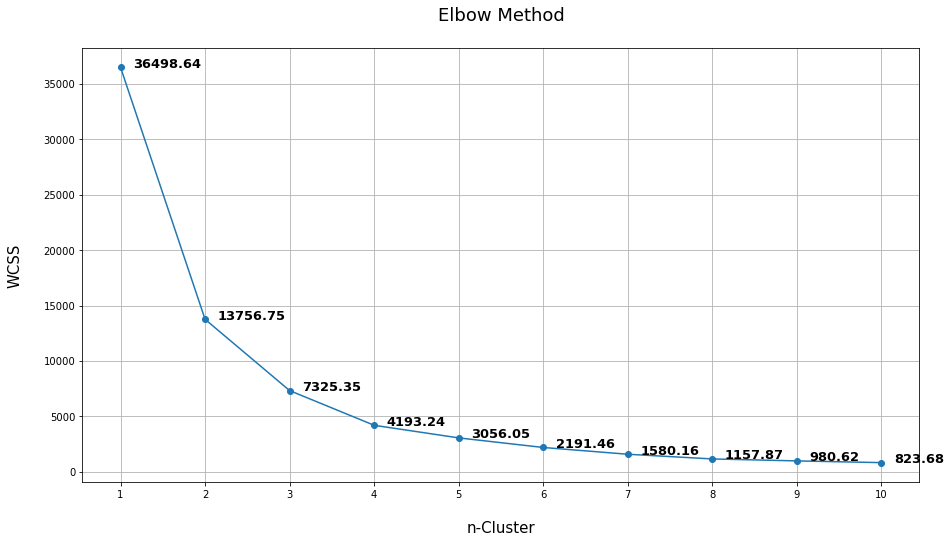

In [15]:
elbowMethod(wineDF)

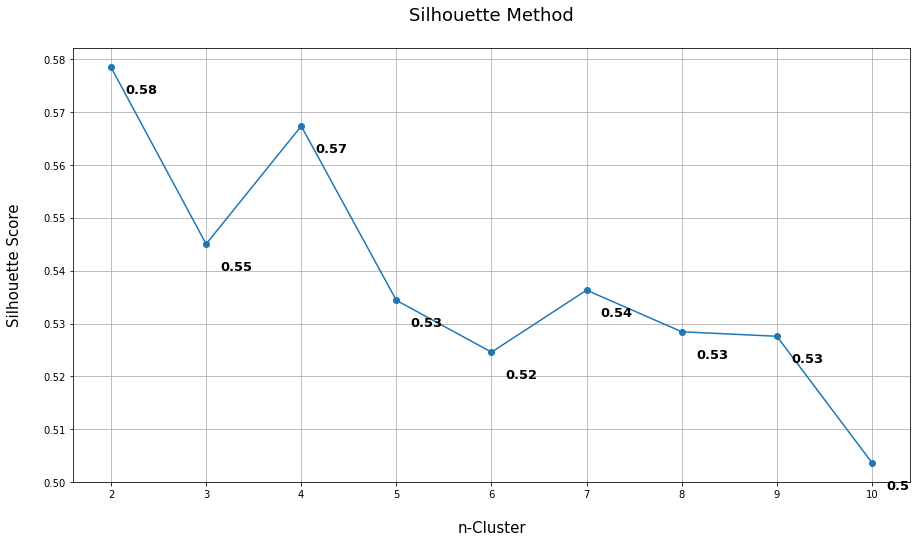

In [16]:
silMethod(wineDF)